<a href="https://colab.research.google.com/github/nayyabRz/MEC_20S19832/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy pandas scikit-learn matplotlib

In [18]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import MinMaxScaler

In [19]:
# Loading dataset
url = "/content/diabetes.csv"
df = pd.read_csv(url)

#  dataset preview
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# Checking if there is any null values in my dataset
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
# Replacing '0' values with the mean of the respective column
for feature in df.columns[1:6]:  # Iterates through columns 2-6
    df[feature] = df[feature].replace(0, df[feature].mean())  # Replaces '0' values with the mean

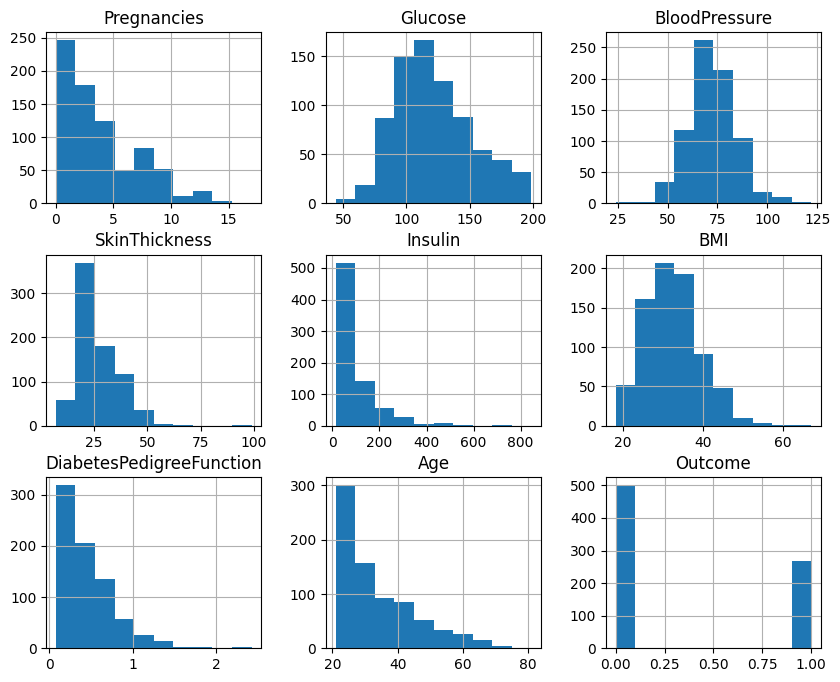

In [6]:
# Visualizing data distribution by histograms
df.hist(figsize=(10, 8))
plt.show()

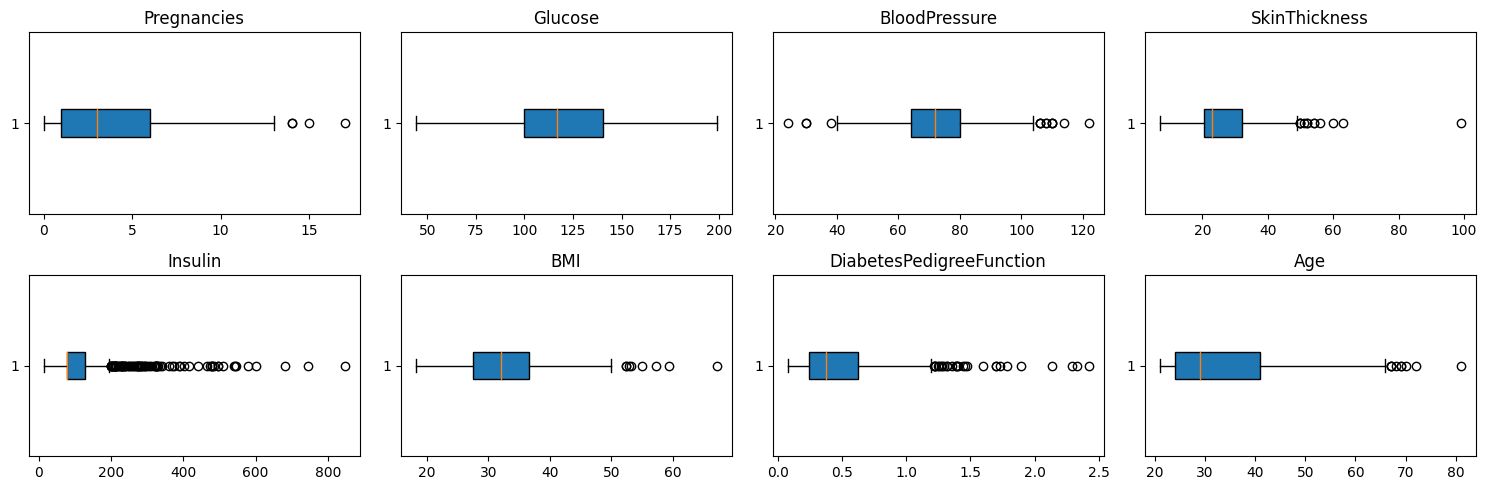

In [7]:
# Visualizing outliers with box plots
plt.figure(figsize=(15, 5))
for i, feature in enumerate(df.columns[:-1]): # Excluding 'Outcome' column
    plt.subplot(2, 4, i+1)
    plt.boxplot(df[feature], vert=False, patch_artist=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [8]:
"""
Preparing data for machine learning models by separating
features (X) for training data & target variable (y) for testing data
"""
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']              # Target variable

# Spliting data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Decision Tree
dt_model = DecisionTreeClassifier() #Initializing Decision Tree
dt_model.fit(X_train, y_train)  # Training Decision Tree model
dt_predictions = dt_model.predict(X_test)  # Predictions from Decision Tree

In [10]:
# Scaling features for KNN model
scaler = MinMaxScaler()  # Initializing MinMaxScaler
scaler.fit(X_train)  # Fit scaler to the training data
X_train_scaled = scaler.transform(X_train)  # Scaling training data
X_test_scaled = scaler.transform(X_test)  # Scaling testing data

In [11]:
# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Initializing KNN model with 5 neighbors
knn_model.fit(X_train_scaled, y_train)  # Training KNN model with scaled data
knn_predictions = knn_model.predict(X_test_scaled)  # Predictions from KNN

In [12]:
# Evaluating models with accuracy, precision, recall, & F1 score for each class
print("Decision Tree Classification Report:")
dt_classification_report = classification_report(y_test, dt_predictions, target_names=["No Diabetes", "Diabetes"])
print(dt_classification_report)

print("KNN Classification Report:")
knn_classification_report = classification_report(y_test, knn_predictions, target_names=["No Diabetes", "Diabetes"])
print(knn_classification_report)

# Parsing the classification reports into dataframes
dt_report_df = pd.DataFrame(classification_report(y_test, dt_predictions, output_dict=True)).transpose()
knn_report_df = pd.DataFrame(classification_report(y_test, knn_predictions, output_dict=True)).transpose()

# Renaming index to match the target names used in classification reports
dt_report_df.rename(index={"0": "No Diabetes", "1": "Diabetes"}, inplace=True)
knn_report_df.rename(index={"0": "No Diabetes", "1": "Diabetes"}, inplace=True)



Decision Tree Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.84      0.73      0.78        99
    Diabetes       0.60      0.75      0.67        55

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.75      0.73      0.74       154

KNN Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.80      0.85      0.82        99
    Diabetes       0.69      0.62      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



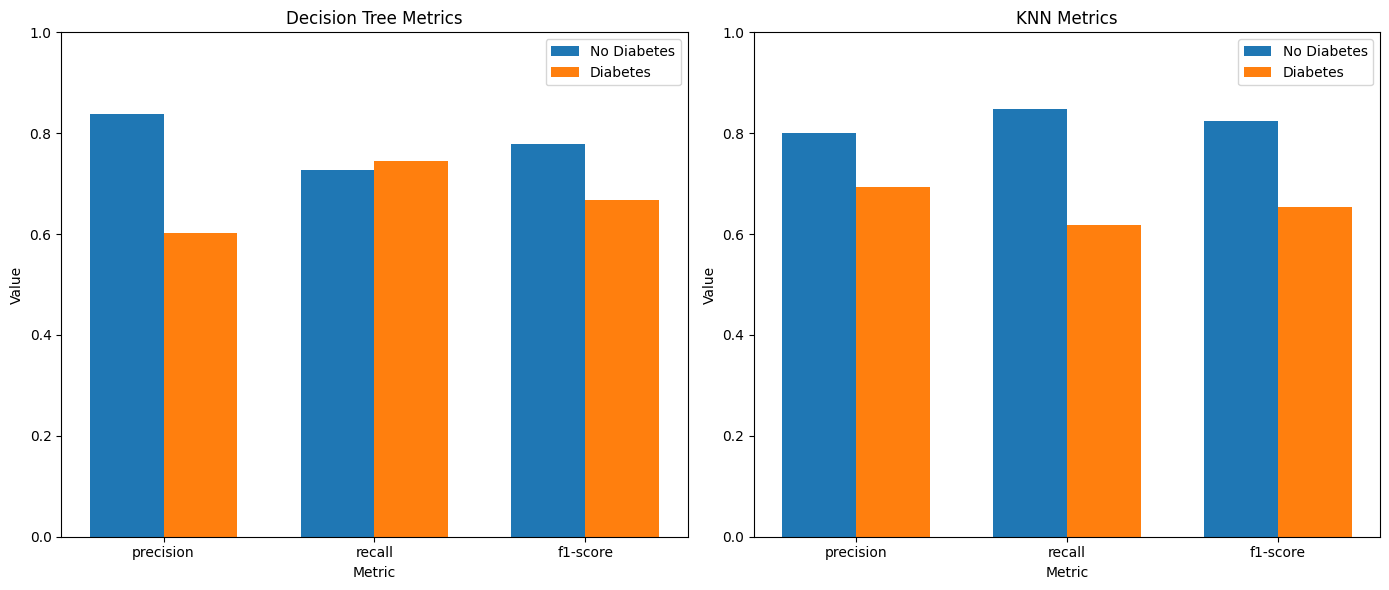

In [15]:
# Metric names
metrics = ['precision', 'recall', 'f1-score']

# X-axis label indices
x = np.arange(len(metrics))

# Bar width
width = 0.35

# Creating a figure and set of subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Ploting Decision Tree metrics
ax[0].bar(x - width/2, dt_report_df.loc['No Diabetes', metrics], width, label='No Diabetes')
ax[0].bar(x + width/2, dt_report_df.loc['Diabetes', metrics], width, label='Diabetes')

# Decision Tree plot settings
ax[0].set_xticks(x)
ax[0].set_xticklabels(metrics)
ax[0].set_ylim(0, 1)
ax[0].legend()
ax[0].set_title('Decision Tree Metrics')
ax[0].set_xlabel('Metric')
ax[0].set_ylabel('Value')

# Ploting KNN metrics
ax[1].bar(x - width/2, knn_report_df.loc['No Diabetes', metrics], width, label='No Diabetes')
ax[1].bar(x + width/2, knn_report_df.loc['Diabetes', metrics], width, label='Diabetes')

# KNN plot settings
ax[1].set_xticks(x)
ax[1].set_xticklabels(metrics)
ax[1].set_ylim(0, 1)
ax[1].legend()
ax[1].set_title('KNN Metrics')
ax[1].set_xlabel('Metric')
ax[1].set_ylabel('Value')

# Adjust layout for better fit
plt.tight_layout()

# Display the plots
plt.show()


In [16]:
# Confusion Matrices
print("Decision Tree Confusion Matrix:")
dt_cm = confusion_matrix(y_test, dt_predictions)
print(dt_cm)

print("KNN Confusion Matrix:")
knn_cm = confusion_matrix(y_test, knn_predictions)
print(knn_cm)

Decision Tree Confusion Matrix:
[[72 27]
 [14 41]]
KNN Confusion Matrix:
[[84 15]
 [21 34]]


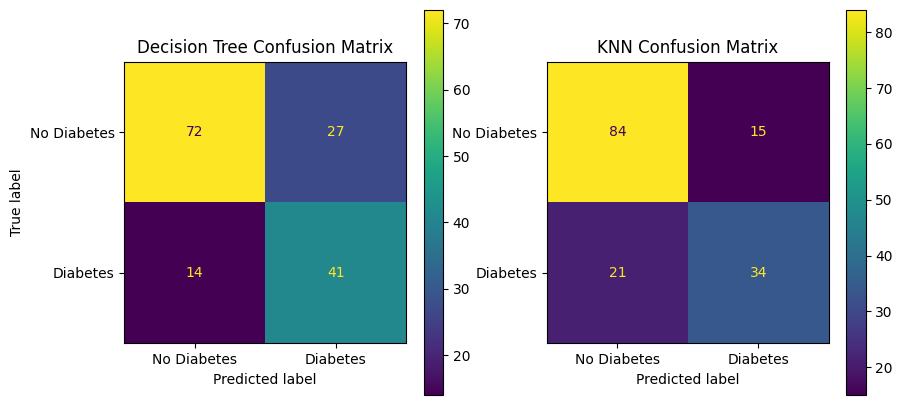

In [17]:
# Displaying confusion matrices using matplotlib
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ConfusionMatrixDisplay(dt_cm, display_labels=["No Diabetes", "Diabetes"]).plot(ax=ax[0])
ax[0].set_title('Decision Tree Confusion Matrix')

ConfusionMatrixDisplay(knn_cm, display_labels=["No Diabetes", "Diabetes"]).plot(ax=ax[1])
ax[1].set_title('KNN Confusion Matrix')

plt.show()